## Spectrograms of various earthquake and non-earthquake signals

A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams.

Un espectrograma es una representaci[on visual del espectro de frecuencias de una senal que varia en el tiempo. 

In [1]:
# by mg.suarez
import matplotlib.pyplot as plt
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

### 1. Comparison of an earthquake and an explosion with similar energy release (magnitude ~ 3) from a similar locatio

In [4]:
#Parameters, variables earthquake
client = Client("IRIS")
station="TUC"
channel="BHZ"
network= "IU"
location = "00"
startt = UTCDateTime("2014-07-11T06:15:50") 
endt = UTCDateTime("2014-07-11T06:17:50")

In [5]:
#Geting the stream object
st = client.get_waveforms(network, station, location, channel, startt, endt)

In [6]:
#Extracting the trace object
tr= st[0]

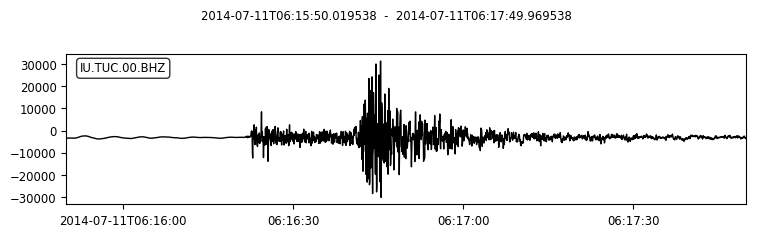

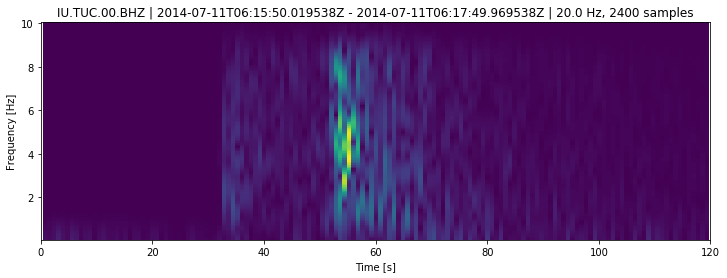

In [14]:
#Ploting the seismogram
fig = tr.plot()
plt.rcParams['figure.figsize'] = (12, 4)
#Plotin Spectrogram
fig = tr.spectrogram(per_lap=.5, wlen=2)
plt.show( )

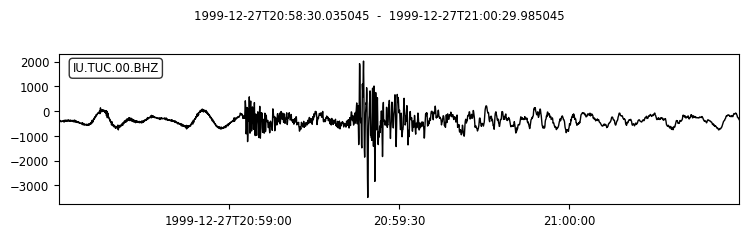

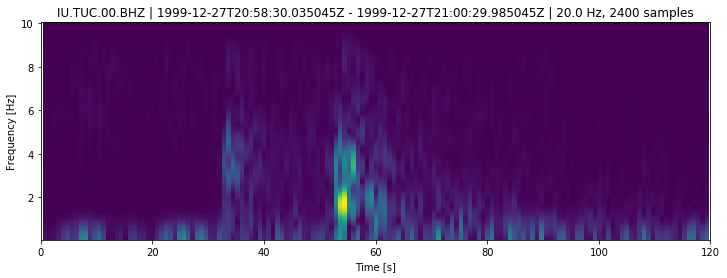

In [16]:
#Parameters, variables explosion
startt = UTCDateTime("1999-12-27T20:58:30")
endt = UTCDateTime("1999-12-27T21:00:30")
#Geting the stream object
st = client.get_waveforms(network, station, location, channel, startt, endt)
#Extracting the trace object
tr= st[0]
#Ploting the seismogram
fig = tr.plot()
plt.rcParams['figure.figsize'] = (12, 4)
#Plotin Spectrogram
fig = tr.spectrogram(per_lap=.5, wlen=2)
plt.show( )

To conclude, earthquakes typically have energy over a wider range of frequencies than explosions. Although this earthquake has energy at frequencies higher than the explosion, it also has energy at the frequencies common for explosions. This highlights how it can be difficult to discern between them if only look at a narrow range of frequencies.

## Ice quakes from Antartica

In [51]:
client = Client("IRIS")
net = "XV"
sta = "B15A"
loc = "01"
cha = "HHZ"

In [52]:
startt = UTCDateTime("2005-10-27T08:15")
endt = UTCDateTime("2005-10-27T09:15")
st = client.get_waveforms(net, sta, loc, cha, startt, endt)

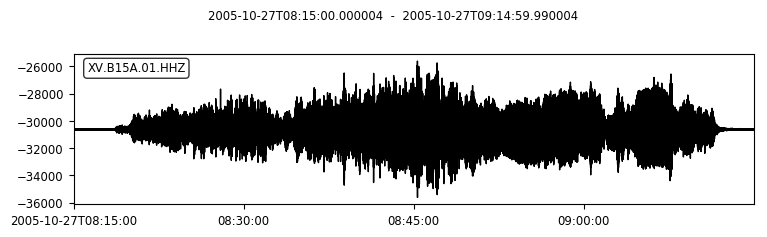

(9.6790140673791775e-05, 8985.243403218552)


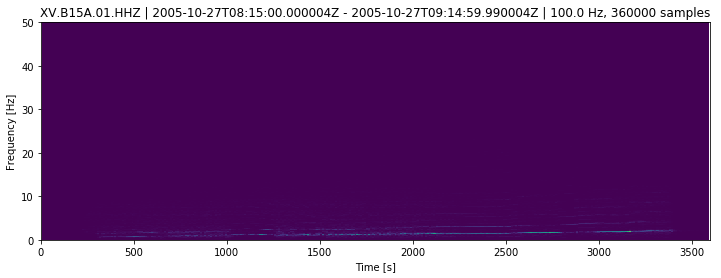

In [53]:
tr= st[0]
#Ploting the seismogram
fig = tr.plot()
plt.rcParams['figure.figsize'] = (12, 4)
#Plotin Spectrogram
fig = tr.spectrogram(show=False, per_lap=.5, wlen=25)
ax = fig.axes[0]
im = ax.images[0]
print(im.get_clim())


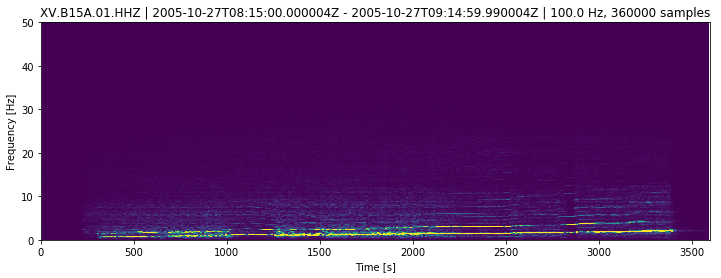

In [54]:
#Modificating parameters to get a better plot
fig = tr.spectrogram(show=False, per_lap=.5, wlen=25)
ax = fig.axes[0]
im = ax.images[0]
im.set_clim(vmax=800)

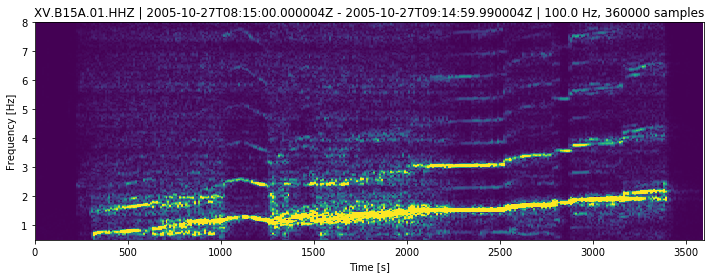

In [55]:
fig = tr.spectrogram(show=False, per_lap=.5, wlen=25)
ax = fig.axes[0]
ax.set_ylim(0.5, 8)
im = ax.images[0]
im.set_clim(vmax=800)

## Denali earthquake on the San Andreas Fault

In [56]:
client = Client("NCEDC")
net = "BK"
sta = "PKD"
loc = ""
cha = "HHE"
startt = UTCDateTime("2002-11-03T22:18")
endt = UTCDateTime("2002-11-03T22:41")

In [57]:
st = client.get_waveforms(net, sta, loc, cha, startt, endt)

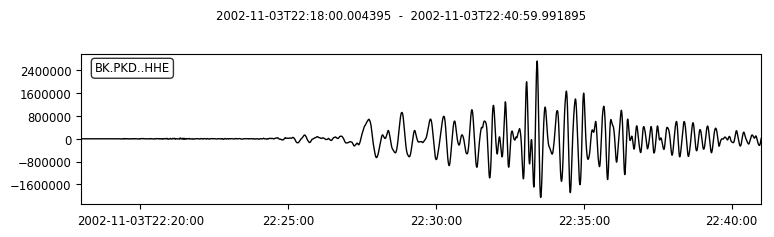

In [58]:
tr= st[0]
#Ploting the seismogram
fig = tr.plot()
plt.rcParams['figure.figsize'] = (12, 4)


(-96.347147429598209, 134.0755363067488)


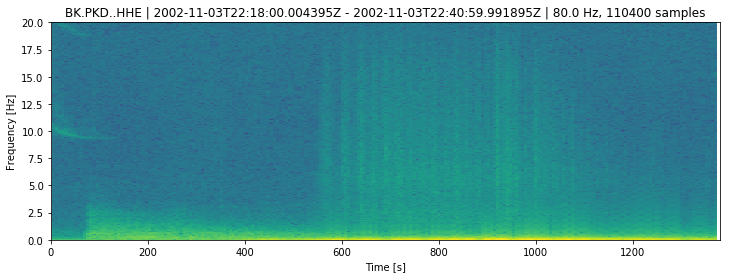

In [60]:
fig = tr.spectrogram(show=False, per_lap=.5, wlen=10, dbscale=True)
ax = fig.axes[0]
ax.set_ylim(0, 20)
im = ax.images[0]
print(im.get_clim())

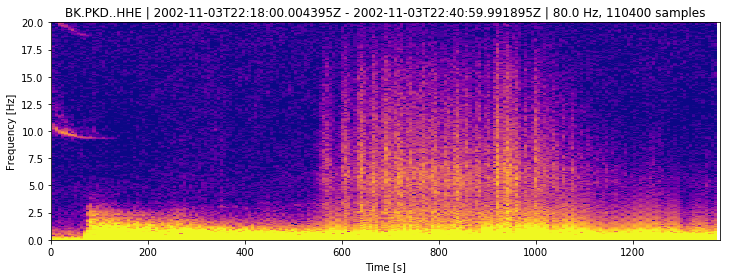

In [61]:
fig = tr.spectrogram(show=False, per_lap=.5, wlen=10, dbscale=True, cmap='plasma')
ax = fig.axes[0]
ax.set_ylim(0, 20)
im = ax.images[0]
im.set_clim(vmin=-10, vmax=50)

In [62]:
ftr = tr.copy()
ftr.filter(type='bandpass', freqmin=2.0, freqmax=20.0)

BK.PKD..HHE | 2002-11-03T22:18:00.004395Z - 2002-11-03T22:40:59.991895Z | 80.0 Hz, 110400 samples

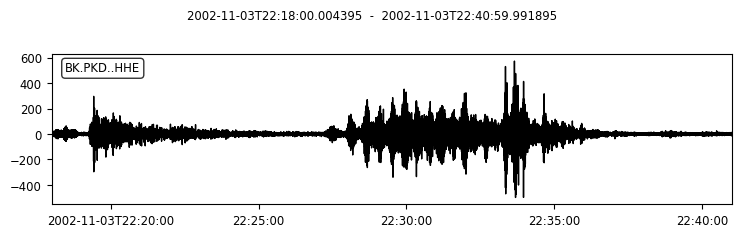

In [63]:
#final seismogram 
fig = ftr.plot()